In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Define the path to your dataset
base_path = '/content/drive/MyDrive/Data_Project/'

In [ ]:
def load_images(directory, label, size=(60, 60)):  # Add a size parameter
    data = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path).convert('L')  # Convert to grayscale here
                img = img.resize(size, Image.ANTIALIAS)  # Resize image to 60x60
                data.append((img, label))
            except IOError:
                print(f"Cannot open image: {img_path}")
    return data

In [ ]:
def to_grayscale(img):
    return img.convert('L')

def edge_detection(img):
    return img.filter(ImageFilter.FIND_EDGES)

def color_histogram(img):
    return img.histogram()

def normalize(features):
    return features / np.linalg.norm(features)


In [ ]:
def pca(X, num_components):
    # Center the data
    X_meaned = X - np.mean(X, axis=0)
    # Calculate covariance matrix
    cov_mat = np.cov(X_meaned, rowvar=False)
    # Eigen decomposition
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    # Select the subset of the eigenvectors (principal components)
    eigenvector_subset = sorted_eigenvectors[:, :num_components]
    total_variance = np.sum(sorted_eigenvalues)
    explained_variances = sorted_eigenvalues[:num_components] / total_variance
    # Transform the data onto the new subspace
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    return X_reduced, eigenvector_subset, explained_variances

In [ ]:
class NaiveBayesClassifier:
    def __init__(self):
        self.model = {}

    def fit(self, features, labels):
        self.labels = np.unique(labels)
        for label in self.labels:
            indices = np.where(labels == label)
            self.model[label] = {
                'prior': len(indices[0]) / len(labels),
                'mean': np.mean(features[indices], axis=0),
                'var': np.var(features[indices], axis=0),
            }

    def predict(self, features):
        results = []
        for feature in features:
            posteriors = []
            for label in self.labels:
                prior = np.log(self.model[label]['prior'])
                likelihood = -0.5 * np.sum(np.log(2. * np.pi * self.model[label]['var']))
                likelihood -= 0.5 * np.sum(((feature - self.model[label]['mean']) ** 2) /
                                           self.model[label]['var'])
                posteriors.append(prior + likelihood)
            results.append(self.labels[np.argmax(posteriors)])
        return np.array(results)


In [ ]:
# Load training and testing data
train_autos = load_images(base_path + 'Cars Dataset/train', label=0)
train_motorcycles = load_images(base_path + 'Motorcycle Dataset/train/motorbike', label=1)
test_autos = load_images(base_path + 'Cars Dataset/test', label=0)
test_motorcycles = load_images(base_path + 'Motorcycle Dataset/test/motorbike', label=1)

<ipython-input-4-70d3d58491b9>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)  # Resize image to 60x60


In [ ]:
# Prepare dataset
train_data = train_autos + train_motorcycles
test_data = test_autos + test_motorcycles

# Process training images
train_images, train_labels = zip(*train_data)
train_images = [to_grayscale(img) for img in train_images]
train_histograms = [color_histogram(img) for img in train_images]
train_features, train_components, train_explained_variances = pca(np.array([normalize(hist) for hist in train_histograms]), 20)

# Process testing images
test_images, test_labels = zip(*test_data)
test_images = [to_grayscale(img) for img in test_images]
test_histograms = [color_histogram(img) for img in test_images]
test_features, test_components, test_explained_variances = pca(np.array([normalize(hist) for hist in test_histograms]), 20)

# Train Naive Bayes Classifier
classifier = NaiveBayesClassifier()
classifier.fit(train_features, np.array(train_labels))

# Predict on test data
predictions = classifier.predict(test_features)

# Calculate accuracy
accuracy = np.mean(predictions == np.array(test_labels))
print(f'Accuracy: {accuracy}')

# Display confusion matrix
def confusion_matrix(true_labels, pred_labels, classes):
    matrix = np.zeros((classes, classes), int)
    for true, pred in zip(true_labels, pred_labels):
        matrix[true][pred] += 1
    return matrix

cm = confusion_matrix(test_labels, predictions, len(np.unique(train_labels)))
print("Confusion Matrix:")
print(cm)

Accuracy: 0.6395080707148347
Confusion Matrix:
[[378 217]
 [252 454]]


In [ ]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print("Training labels:", np.bincount(train_labels))
print("Testing labels:", np.bincount(test_labels))

Training labels: [1203 1374]
Testing labels: [595 706]


Accuracy with 1 PCA components: 0.644119907763259
Accuracy with 2 PCA components: 0.6402767102229054
Accuracy with 3 PCA components: 0.6418139892390469
Accuracy with 4 PCA components: 0.6502690238278247
Accuracy with 5 PCA components: 0.6518063028439662
Accuracy with 6 PCA components: 0.6602613374327441
Accuracy with 7 PCA components: 0.6571867794004612
Accuracy with 8 PCA components: 0.6587240584166026
Accuracy with 9 PCA components: 0.6610299769408148
Accuracy with 10 PCA components: 0.6648731744811683
Accuracy with 11 PCA components: 0.6671790930053805
Accuracy with 12 PCA components: 0.6625672559569562
Accuracy with 13 PCA components: 0.6625672559569562
Accuracy with 14 PCA components: 0.6602613374327441
Accuracy with 15 PCA components: 0.6594926979246734
Accuracy with 16 PCA components: 0.6548808608762491
Accuracy with 17 PCA components: 0.6510376633358954
Accuracy with 18 PCA components: 0.6410453497309762
Accuracy with 19 PCA components: 0.633358954650269
Accuracy with 20 PCA co

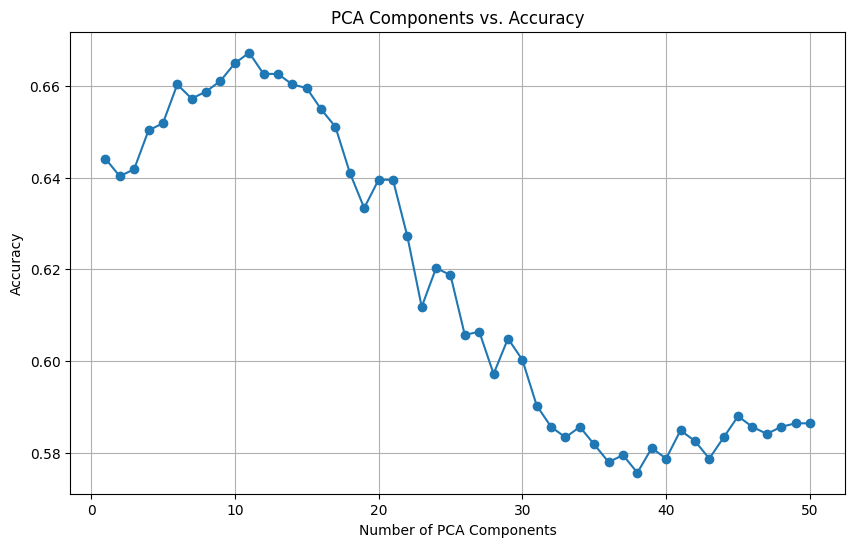

In [ ]:
import matplotlib.pyplot as plt

def evaluate_pca_components(max_components, train_data, train_labels, test_data, test_labels):
    accuracies = []
    components_range = range(1, max_components + 1)
    for num_components in components_range:
        # Apply PCA on training data
        train_features, _, _ = pca(np.array([normalize(hist) for hist in train_data]), num_components)
        # Apply PCA on testing data using same number of components
        test_features, _, _ = pca(np.array([normalize(hist) for hist in test_data]), num_components)

        # Train Naive Bayes Classifier
        classifier = NaiveBayesClassifier()
        classifier.fit(train_features, np.array(train_labels))

        # Predict on test data
        predictions = classifier.predict(test_features)

        # Calculate accuracy
        accuracy = np.mean(predictions == np.array(test_labels))
        accuracies.append(accuracy)
        print(f"Accuracy with {num_components} PCA components: {accuracy}")

    return components_range, accuracies

# Preprocess and normalize histograms outside the function to avoid redundant processing
normalized_train_histograms = [normalize(hist) for hist in train_histograms]
normalized_test_histograms = [normalize(hist) for hist in test_histograms]

# Evaluate PCA components
components_range, accuracies = evaluate_pca_components(50, normalized_train_histograms, np.array(train_labels), normalized_test_histograms, np.array(test_labels))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracies, marker='o')
plt.title('PCA Components vs. Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
def pca_with_eig(X, num_components):
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    return X_reduced, eigenvector_subset, eigen_values

# Adjust how PCA is called
train_features, train_components, train_eigen_values = pca_with_eig(np.array([normalize(hist) for hist in train_histograms]), 50)
test_features, _, _ = pca_with_eig(np.array([normalize(hist) for hist in test_histograms]), 50)


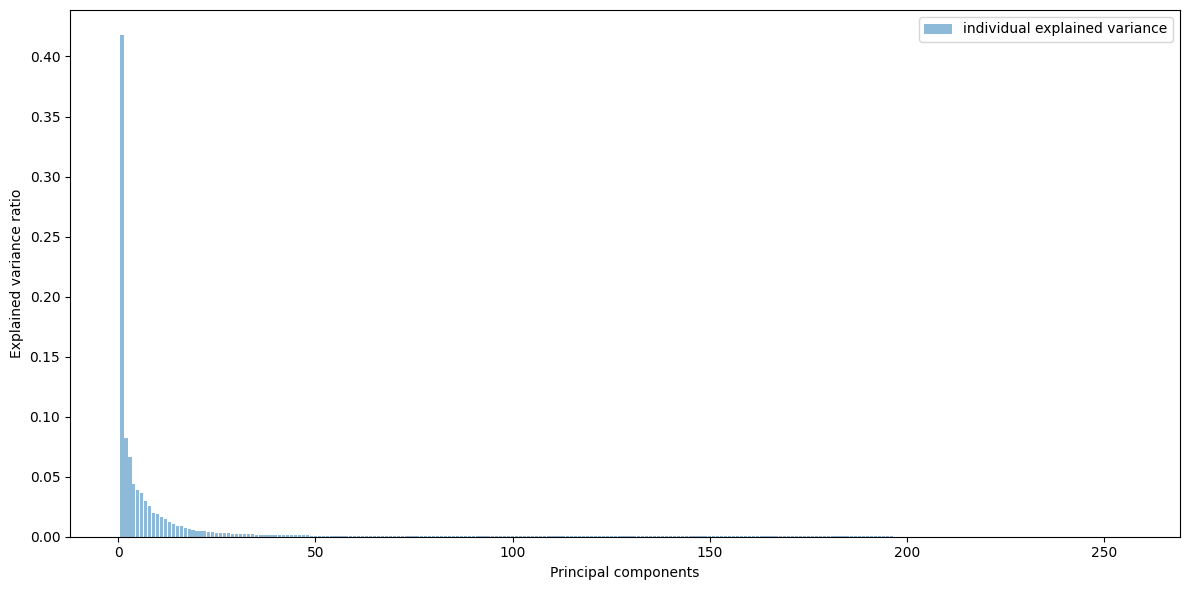

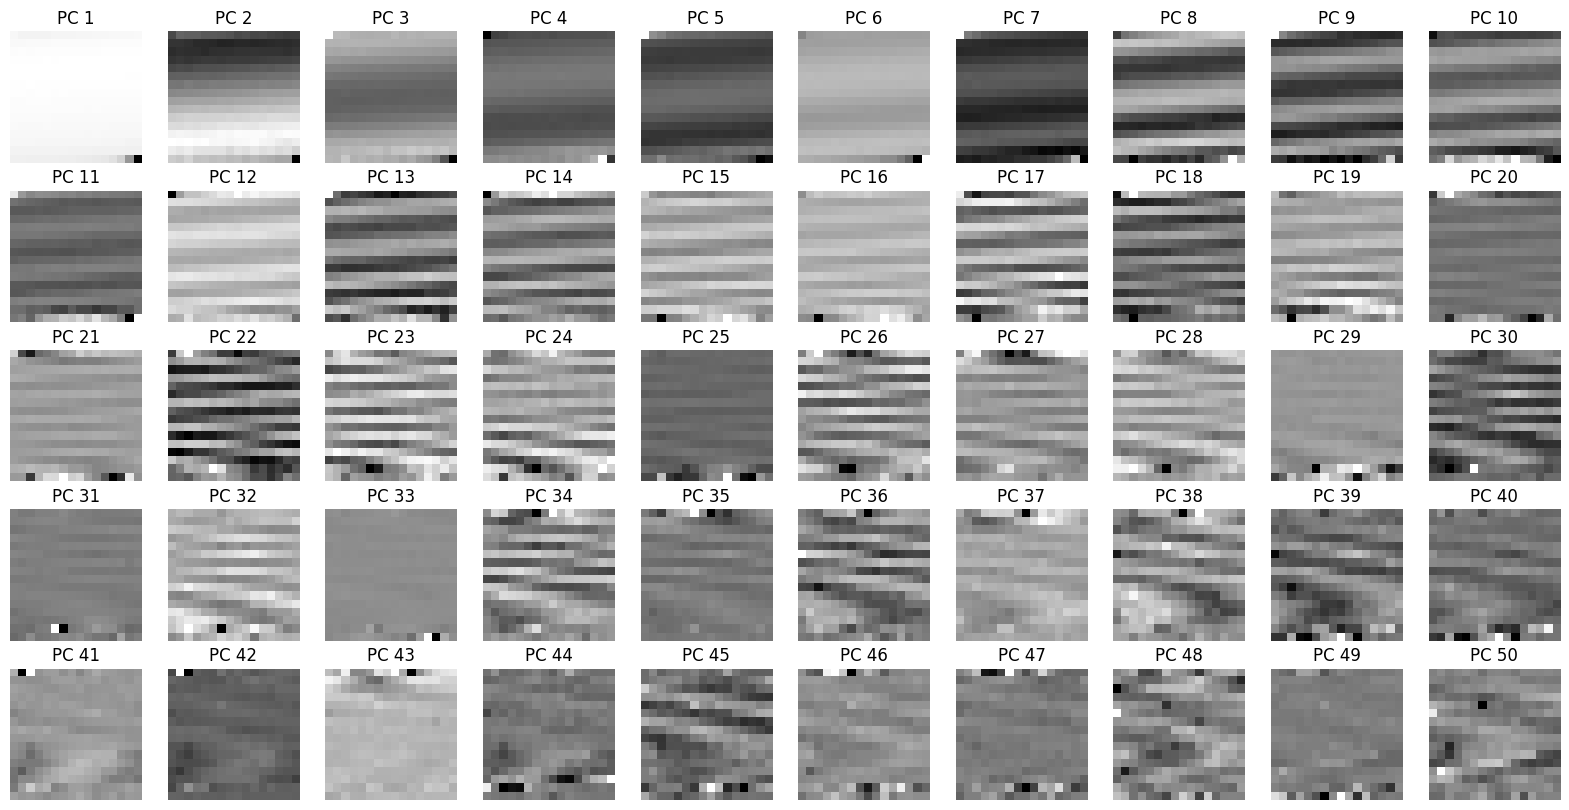

In [ ]:
def plot_principal_components(components, eigen_values):
    total_variance = np.sum(eigen_values)
    explained_variances = eigen_values / total_variance
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, len(explained_variances) + 1), explained_variances, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

    # Set number of rows and columns based on the number of components available
    num_components = components.shape[1]
    n_rows = (num_components + 9) // 10  # This ensures we have enough rows for all components
    n_cols = 10 if num_components >= 10 else num_components  # Use fewer columns if fewer than 10 components

    plt.figure(figsize=(20, max(2, n_rows * 2)))  # Ensure figure size is appropriate for the number of rows
    for i in range(num_components):  # Only iterate over the available number of components
        ax = plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(components[:, i].reshape(16, 16), cmap='gray')  # Adjust reshape if needed
        plt.title(f'PC {i+1}')
        plt.axis('off')
    plt.show()


plot_principal_components(train_components, train_eigen_values)


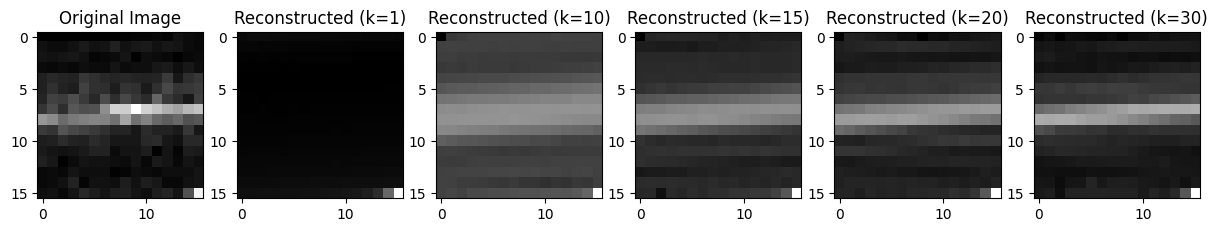

In [ ]:
def reconstruct_images(image, components, ks):
    mean_image = np.mean(image, axis=0)
    fig, axs = plt.subplots(1, len(ks) + 1, figsize=(15, 5))
    axs[0].imshow(image.reshape(16, 16), cmap='gray')  # Adjust the reshape to 16x16
    axs[0].set_title("Original Image")
    for i, k in enumerate(ks):
        weights = np.dot(image - mean_image, components[:, :k])
        reconstructed = mean_image + np.dot(weights, components[:, :k].T)
        axs[i+1].imshow(reconstructed.reshape(16, 16), cmap='gray')  # Adjust the reshape to 16x16
        axs[i+1].set_title(f"Reconstructed (k={k})")
    plt.show()
first_image = np.array(normalize(train_histograms[0]))
reconstruct_images(first_image, train_components, ks=[1, 10, 15, 20, 30])

In [ ]:
def k_fold_split(X, y, k):
    """Split data into k folds."""
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X_folds = np.array_split(X[indices], k)
    y_folds = np.array_split(y[indices], k)
    return X_folds, y_folds

def cross_validate(X, y, k, classifier_class):
    """Perform k-fold cross-validation."""
    X_folds, y_folds = k_fold_split(X, y, k)
    accuracies = []

    for i in range(k):
        # Prepare training and validation sets
        X_train = np.vstack([X_folds[j] for j in range(k) if j != i])
        y_train = np.hstack([y_folds[j] for j in range(k) if j != i])
        X_val = X_folds[i]
        y_val = y_folds[i]

        # Train the classifier
        classifier = classifier_class()
        classifier.fit(X_train, y_train)

        # Predict on validation set
        y_pred = classifier.predict(X_val)

        # Calculate accuracy
        accuracy = np.mean(y_pred == y_val)
        accuracies.append(accuracy)
        print(f"Fold {i + 1} Accuracy: {accuracy:.4f}")

    # Calculate average accuracy
    avg_accuracy = np.mean(accuracies)
    print(f"Average Accuracy: {avg_accuracy:.4f}")

    return avg_accuracy, accuracies

# Prepare the dataset
all_data = train_data + test_data
all_images, all_labels = zip(*all_data)
all_images = [to_grayscale(img) for img in all_images]
all_histograms = [color_histogram(img) for img in all_images]
all_features, all_components, all_explained_variances = pca(np.array([normalize(hist) for hist in all_histograms]), 10)

# Convert to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)

# Perform 5-fold cross-validation
average_accuracy, fold_accuracies = cross_validate(all_features, all_labels, 5, NaiveBayesClassifier)


Fold 1 Accuracy: 0.6611
Fold 2 Accuracy: 0.6443
Fold 3 Accuracy: 0.6353
Fold 4 Accuracy: 0.6542
Fold 5 Accuracy: 0.6671
Average Accuracy: 0.6524
